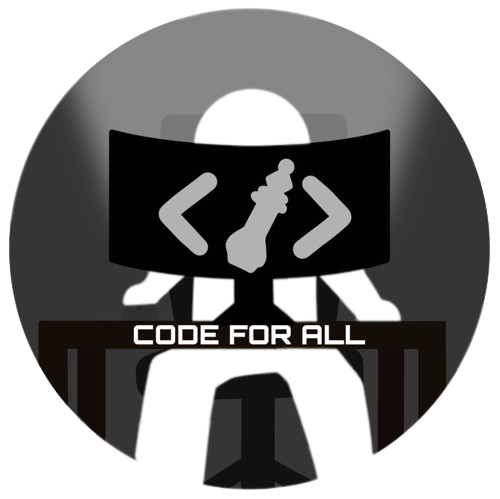
# QC Professor Data Analysis: Accounting & Information Systems
---

### Average GPA of the entire ACCT subject: 2.9, which is equivalent to a B-
### Hardest class in the entire ACCT subject: ACCT 201 with an average GPA of 2.3, which is equivalent to a C+
### Average withdrawal rate for the entire ACCT subject: 11.03%
---

## IMPORTANT FUNCTIONS USED IN THIS NOTEBOOK:

* **gpa_letter_converter()**, which takes in a GPA value and converts it into a letter grade character using tuples (of the float data type) consisting of grade ranges
* **calculate_average_gpas()**, which automates the process of going through every class number and also every professor for every class number
* **calculate_teacher_gpas()**, which automates the process of going through every professor in a subject irrespective of class number, getting their GPA value, and comparing it to the average GPA for the entire subject

### These functions will be used in every subject analysis that we complete per subject!

---
## To skip over to the conclusion of this project, which is a non-technical and detailed analysis of the subject, scroll down to the "ACCT Analysis by Class" section.

---
# Data Processing & Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = "https://docs.google.com/spreadsheets/d/1mS6khEB6m8cPNenNvY9Tg6bJ6YkmcvCI/export?format=csv&gid=1283335856"
df = pd.read_csv(url)

### Only a certain amount of columns may be analyzed from the spreadsheet. This includes the official grades, professor, and general class information

In [2]:
valid_columns = ["SUBJECT", "NBR", "COURSE NAME", "PROF", "TOTAL", "A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D", "F", "W", "AVG GPA"]
analysis_df = df[valid_columns]

### This analysis will only take into account the classes from the ACCT subject, so a separate dataframe must be created. After that, an option must be set so whenever the dataframe is called, it will display as many rows as possible

In [3]:
ACCT_df = analysis_df.loc[analysis_df["SUBJECT"] == "ACCT"]
pd.set_option('display.max_rows', None)
ACCT_df

,SUBJECT,NBR,COURSE NAME,PROF,TOTAL,A+,A,A-,B+,B,B-,C+,C,C-,D,F,W,AVG GPA
0,ACCT,100,Fin & Mgr Acct,"HO, V",28,0,11,2,1,3,3,0,3,0,0,0,5,3.383
1,ACCT,101,Intro Thry & Prac of Acct I,"CHAN, J",29,0,13,2,0,4,5,0,0,1,0,0,3,3.464
2,ACCT,101,Intro Thry & Prac of Acct I,"RUTHIZER, S",50,2,9,14,6,4,5,0,1,0,3,2,3,3.176
3,ACCT,101,Intro Thry & Prac of Acct I,"GRUZA, M",45,1,2,3,1,5,0,6,0,0,0,0,25,3.067
4,ACCT,101,Intro Thry & Prac of Acct I,"FEISULLIN, A",45,4,6,1,7,5,0,6,9,1,1,0,4,2.908
5,ACCT,101,Intro Thry & Prac of Acct I,"COWAN DOCKERY, M",45,6,1,1,4,3,2,2,11,0,0,1,9,2.771
6,ACCT,101,Intro Thry & Prac of Acct I,"THALER, M",45,0,0,4,5,7,4,5,9,0,1,0,8,2.674
7,ACCT,101,Intro Thry & Prac of Acct I,"SOLARSH, E",45,3,4,2,3,2,3,1,6,7,0,2,9,2.594
8,ACCT,101,Intro Thry & Prac of Acct I,"SOLARSH, E",45,4,1,3,3,7,2,0,8,5,0,3,6,2.553
9,ACCT,101,Intro Thry & Prac of Acct I,"DAUBER, N",50,2,0,1,3,7,2,2,7,3,6,6,10,1.992


### From this, it can be concluded that the ACCT has no classes where the GPA is 0 so there are no null values. However, the data contains data for non-undergraduate classes, so it must be cleaned by using regular expressions and Boolean masking

In [4]:
# The class number must start with a digit from 1-3, followed by 2 digits from 0-9
# The number can also have a W at the end to represent writing-intensive classes

CourseNumberPattern = r'^[1-3][0-9]{2}W?$'

mask = ACCT_df['NBR'].str.contains(CourseNumberPattern) # Finds what rows match the regular expression pattern

In [5]:
ACCT_df = ACCT_df[mask] # If mask is false, the rows must be entirely removed from the dataframe to prevent false results
ACCT_df

,SUBJECT,NBR,COURSE NAME,PROF,TOTAL,A+,A,A-,B+,B,B-,C+,C,C-,D,F,W,AVG GPA
0,ACCT,100,Fin & Mgr Acct,"HO, V",28,0,11,2,1,3,3,0,3,0,0,0,5,3.383
1,ACCT,101,Intro Thry & Prac of Acct I,"CHAN, J",29,0,13,2,0,4,5,0,0,1,0,0,3,3.464
2,ACCT,101,Intro Thry & Prac of Acct I,"RUTHIZER, S",50,2,9,14,6,4,5,0,1,0,3,2,3,3.176
3,ACCT,101,Intro Thry & Prac of Acct I,"GRUZA, M",45,1,2,3,1,5,0,6,0,0,0,0,25,3.067
4,ACCT,101,Intro Thry & Prac of Acct I,"FEISULLIN, A",45,4,6,1,7,5,0,6,9,1,1,0,4,2.908
5,ACCT,101,Intro Thry & Prac of Acct I,"COWAN DOCKERY, M",45,6,1,1,4,3,2,2,11,0,0,1,9,2.771
6,ACCT,101,Intro Thry & Prac of Acct I,"THALER, M",45,0,0,4,5,7,4,5,9,0,1,0,8,2.674
7,ACCT,101,Intro Thry & Prac of Acct I,"SOLARSH, E",45,3,4,2,3,2,3,1,6,7,0,2,9,2.594
8,ACCT,101,Intro Thry & Prac of Acct I,"SOLARSH, E",45,4,1,3,3,7,2,0,8,5,0,3,6,2.553
9,ACCT,101,Intro Thry & Prac of Acct I,"DAUBER, N",50,2,0,1,3,7,2,2,7,3,6,6,10,1.992


In [6]:
ACCT_df.shape

(73, 18)

---
# Exploratory Data Analysis (EDA)

### The isinstance() function used returns True if the specified object matches the specified data type, and returns False otherwise. If the number_grade matches a value in a tuple, it falls into the range needed for its corresponding letter grade.
#### (https://stackoverflow.com/questions/1549801/what-are-the-differences-between-type-and-isinstance)

In [7]:
def gpa_letter_converter(gpa):
    letter_grades = {
        "A": 4.0, 
        "A-": (3.7, 3.8, 3.9), 
        "B+": (3.3, 3.4, 3.5, 3.6), 
        "B": (3.0, 3.1, 3.2), 
        "B-": (2.7, 2.8, 2.9), 
        "C+": (2.3, 2.4, 2.5, 2.6),
        "C": (2.0, 2.1, 2.2), 
        "C-": (1.7, 1.8, 1.9),
        "D": (1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6),
        "F": (0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)
    }
    for letter_grade, number_grade in letter_grades.items():
        if isinstance(number_grade, float) and gpa == number_grade: # In this case, the only float data type would be for an A
            return letter_grade
        elif isinstance(number_grade, tuple) and gpa in number_grade:
            return letter_grade
    
    return None

### In pandas, both unique and nunique are used to get unique values of a series object, but they serve different purposes and return different types of output:

* **unique()**: This function returns an array of all unique values in the order that they appear in the original DataFrame or Series. It's useful when you want to see or use the actual unique values (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) 

* **nunique()**: This function returns an integer that represents the number of unique values. It's useful when you just want to know how many unique values exist, rather than what those unique values are (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html) 

### iloc[]: 
* Purely integer-location based indexing for selection by position (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

### sort_values(): 
* Sort by values along either axis (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [8]:
def calculate_average_gpas(df):
    # Prepare a list to store the results
    results = []

    # Loop over all unique course numbers
    for class_nbr in df["NBR"].unique():
        # Filter the DataFrame for the current course number
        df_nbr = df[df["NBR"] == class_nbr]

        # Loop over all unique professors for the current course number
        for prof in df_nbr["PROF"].unique():
            # Filter the DataFrame for the current professor
            df_prof = df_nbr[df_nbr["PROF"] == prof]

            # Calculate the average GPA for the current professor and course number
            avg_gpa_prof = round(df_prof["AVG GPA"].mean(), 1)

            # Append the result to the list
            results.append({
                "CLASS NUMBER": class_nbr,
                "PROF": prof,
                "AVG GPA PROF": avg_gpa_prof,
                "AVG GPA PROF LETTER": gpa_letter_converter(avg_gpa_prof)
            })

        # If there is more than one professor for this course, calculate the average GPA for the current course number, regardless of the professor
        if df_nbr["PROF"].nunique() > 1:
            avg_gpa_nbr = round(df_nbr["AVG GPA"].mean(), 1)

            # Append the result to the list
            results.append({
                "CLASS NUMBER": class_nbr,
                "PROF": "All Professors",
                "AVG GPA PROF": avg_gpa_nbr,
                "AVG GPA PROF LETTER": gpa_letter_converter(avg_gpa_nbr)
            })

    # Convert the list of results to a DataFrame
    df_results = pd.DataFrame(results)
    
    # Find the hardest class based on average GPA
    hardest_class = df_results[df_results["PROF"] == "All Professors"].sort_values("AVG GPA PROF").iloc[0]

    # Calculate the average GPA for the entire subject
    avg_gpa_subject = round(df["AVG GPA"].mean(), 1)

    print(f"The average GPA for this entire subject in Fall 2022 was: {avg_gpa_subject}, which is equal to a {gpa_letter_converter(avg_gpa_subject)}")
    print(f"The hardest class based on average GPA in Fall 2022 was ACCT {hardest_class['CLASS NUMBER']} with an average GPA of {hardest_class['AVG GPA PROF']}, which is equal to a {hardest_class['AVG GPA PROF LETTER']}")

    return df_results

ACCT_class_analysis = calculate_average_gpas(ACCT_df)
ACCT_class_analysis

The average GPA for this entire subject in Fall 2022 was: 2.9, which is equal to a B-
The hardest class based on average GPA in Fall 2022 was ACCT 201 with an average GPA of 2.3, which is equal to a C+


,CLASS NUMBER,PROF,AVG GPA PROF,AVG GPA PROF LETTER
0,100,"HO, V",3.4,B+
1,101,"CHAN, J",3.5,B+
2,101,"RUTHIZER, S",3.2,B
3,101,"GRUZA, M",3.1,B
4,101,"FEISULLIN, A",2.9,B-
5,101,"COWAN DOCKERY, M",2.8,B-
6,101,"THALER, M",2.7,B-
7,101,"SOLARSH, E",2.6,C+
8,101,"DAUBER, N",2.0,C
9,101,All Professors,2.8,B-


In [9]:
def calculate_teacher_gpas(df):
    # Prepare a list to store the results
    results = []

    # Loop over all unique professors
    for prof in sorted(df["PROF"].unique()):
        # Filter the DataFrame for the current professor
        df_prof = df[df["PROF"] == prof]

        # Calculate the average GPA for the current professor
        avg_gpa_prof = round(df_prof["AVG GPA"].mean(), 1)

        # Calculate the percentage of students who withdrew for the current professor
        withdraw_percentage = df_prof["W"].sum() / df_prof["TOTAL"].sum()

        # Append the result to the list
        results.append({
            "PROF": prof,
            "AVG GPA PROF": avg_gpa_prof,
            "AVG GPA PROF LETTER": gpa_letter_converter(avg_gpa_prof),
            "NUM OF CLASSES": len(df_prof),
            "WITHDRAW PERCENTAGE": round(withdraw_percentage * 100, 1)
        })

    # Convert the list of results to a DataFrame
    df_results = pd.DataFrame(results)

    # Calculate the average GPA for the entire subject
    avg_gpa_subject = round(df["AVG GPA"].mean(), 1)
    
    # Calculate the average withdrawal percentage for the entire subject
    withdraw_percentage_subject = round((df["W"].sum() / df["TOTAL"].sum()) * 100, 2)
    
    # Find the professors who teach more than one class, have a GPA that is the same or higher than the subject average GPA,
    # and for whom less than 40% of students withdrew
    best_profs = df_results[(df_results["NUM OF CLASSES"] > 1) & (df_results["AVG GPA PROF"] >= avg_gpa_subject) & (df_results["WITHDRAW PERCENTAGE"] <= withdraw_percentage_subject)]

    print(f"Professors who teach more than one class, have a GPA that is the same or higher than the subject average GPA ({avg_gpa_subject}), and have a withdrawal percentage that is less or equal than the subject average withdrawal percentage ({withdraw_percentage_subject}%):\n")
    print(best_profs, "\n")
    print("Please note that this automated analysis does not take ratings from RMP (RateMyProfessors) into account. While the provided statistics are based on GPA, it cannot conclude the amount of material students learned from each professor.")

    return df_results

ACCT_prof_analysis = calculate_teacher_gpas(ACCT_df)
ACCT_prof_analysis

Professors who teach more than one class, have a GPA that is the same or higher than the subject average GPA (2.9), and have a withdrawal percentage that is less or equal than the subject average withdrawal percentage (11.03%):

               PROF  AVG GPA PROF AVG GPA PROF LETTER  NUM OF CLASSES  \
0       ADELBERG, A           3.7                  A-               2   
1         ALTMAN, J           2.9                  B-               3   
2       BALKARAN, D           3.1                   B               2   
3         BARONE, E           2.9                  B-               2   
4   BLUMENFRUCHT, I           3.2                   B               2   
22          LINN, D           3.2                   B               2   
24         QAMAR, Z           3.4                  B+               2   
25       QURESHI, A           3.5                  B+               2   
26        ROSANO, E           3.0                   B               2   
28      RUTHIZER, S           3.0        

,PROF,AVG GPA PROF,AVG GPA PROF LETTER,NUM OF CLASSES,WITHDRAW PERCENTAGE
0,"ADELBERG, A",3.7,A-,2,5.8
1,"ALTMAN, J",2.9,B-,3,3.8
2,"BALKARAN, D",3.1,B,2,9.7
3,"BARONE, E",2.9,B-,2,0.0
4,"BLUMENFRUCHT, I",3.2,B,2,3.6
5,"CALAMARI, J",2.7,B-,1,3.7
6,"CHAN, J",3.5,B+,1,10.3
7,"COHEN, M",3.1,B,2,13.2
8,"COWAN DOCKERY, M",2.5,C+,2,24.2
9,"DAUBER, N",2.4,C+,3,7.9


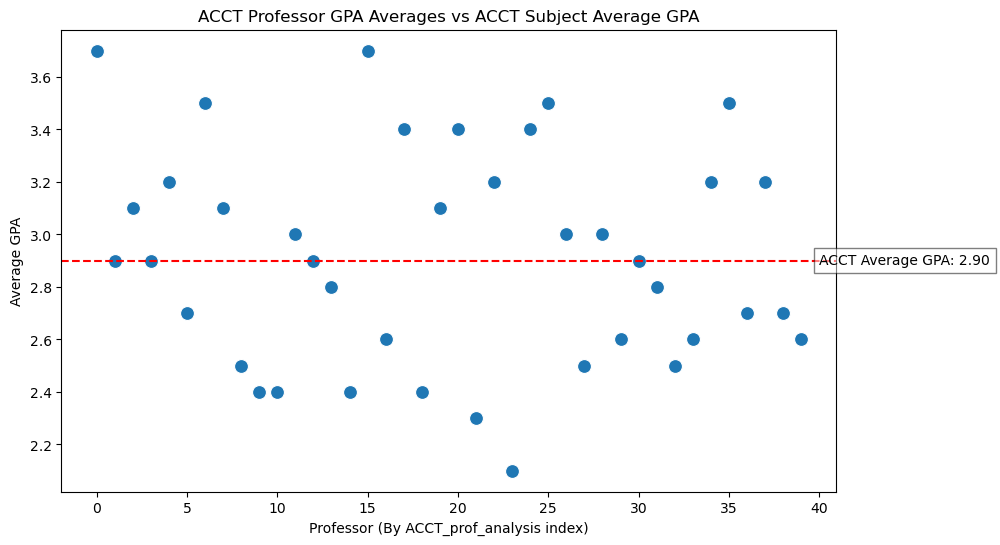

In [10]:
# Set the overall average GPA
mean_gpa = 2.9

# Create a scatter plot using both Matplotlib and Seaborn
plt.figure(figsize = (10, 6))
scatter_plot = sns.scatterplot(x = list(range(len(ACCT_prof_analysis))), y = ACCT_prof_analysis['AVG GPA PROF'], s = 100)

# Add a line for the average GPA
plt.axhline(mean_gpa, color = 'red', linestyle = '--')

# Annotate the line with the mean GPA
plt.text(len(ACCT_prof_analysis), mean_gpa, f"ACCT Average GPA: {mean_gpa:.2f}", va = 'center', ha = "left", bbox = dict(facecolor = "w", alpha = 0.5))

# Set the labels and title
plt.xlabel('Professor (By ACCT_prof_analysis index)')
plt.ylabel('Average GPA')
plt.title("ACCT Professor GPA Averages vs ACCT Subject Average GPA")

# Show the plot
plt.show()

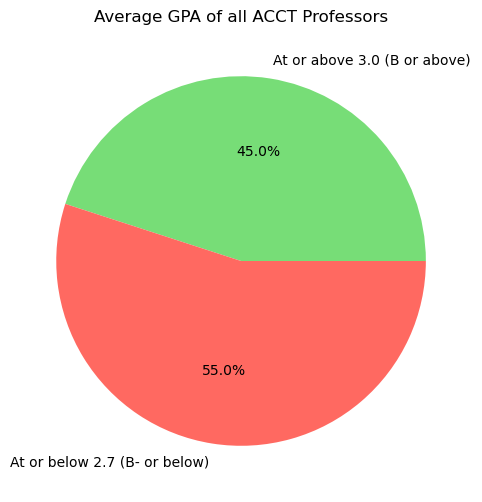

In [11]:
# Count the number of professors with an average GPA at or greater than 3.0 and those less than 3.0
# The red percentage assumes that if a professor's GPA falls in the cutoff (greater than 2.7 but less than 3.0), it will automatically be rounded to a B- (2.7)
green_percentage = ACCT_prof_analysis[ACCT_prof_analysis['AVG GPA PROF'] >= 3.0].shape[0]
red_percentage = ACCT_prof_analysis[ACCT_prof_analysis['AVG GPA PROF'] < 3.0].shape[0]

# Create the values and labels for the pie chart
values = [green_percentage, red_percentage]
labels = ['At or above 3.0 (B or above)', 'At or below 2.7 (B- or below)']

# Define the colors for each section (green and red)
colors = ['#77dd77', '#ff6961']

# Plot the pie chart
plt.figure(figsize = (6, 6))
plt.pie(values, labels = labels, colors = colors, autopct = '%1.1f%%')

# Set the title
plt.title("Average GPA of all ACCT Professors")

# Show the plot
plt.show()

---

# ACCT Analysis by Class

## *Throughout the ACCT subject in Fall 2022, the hardest class based on average GPA was ACCT 201 with an average GPA of 2.3, which is equal to a C+*
## The provided RMP (RateMyProfessors) average ratings will be as of September 2023 and manually provided without the use of web scraping

**ACCT 100 (Financial and Managerial Accounting)** - This is a course in the theories and principles of financial and managerial accounting. Financial accounting includes the study of the preparation and interpretation of commonly used financial statements. Managerial accounting deals with the use of accounting data for managerial control and planning. Students will be introduced to the use of accounting systems programmed for the microcomputer, and to managerial decision making based on mathematical modeling.

### Professor:
* Vivian Ho (https://www.ratemyprofessors.com/professor/1742730), AVG GPA: 3.4 (equivalent to a B+), AVG RMP Rating: 3.8/5

---

**ACCT 101 (Introduction to the Theory and Practice of Accounting I)** - Fundamentals of accounting information, the foundation of the accounting system for recording assets, liability and equity transactions, financial statement principles, and the preparation and interpretation of basic financial statements. Structure, double-entry model, initial, adjusting, and closing entries are covered.

### Professors:
* Joseph Chan (https://www.ratemyprofessors.com/professor/2019604), AVG GPA: 3.5 (equivalent to a B+), AVG RMP Rating: 4.6/5

* Scott Ruthizer (https://www.ratemyprofessors.com/professor/139834), AVG GPA: 3.0 (equivalent to a B), AVG RMP Rating: 4.3/5

* Marvin Gruza (https://www.ratemyprofessors.com/professor/623836), AVG GPA: 2.8 (equivalent to a B-), AVG RMP Rating: 2.3/5

* Anita Feisullin (https://www.ratemyprofessors.com/professor/1632337), AVG GPA: 3.0 (equivalent to a B), AVG RMP Rating: 4.1/5

* Marlene Cowan Dockery (https://www.ratemyprofessors.com/professor/1855770), AVG GPA: 2.5 (equivalent to a C+), AVG RMP Rating: 4/5

* Michael Thaler (https://www.ratemyprofessors.com/professor/2395806), AVG GPA: 2.7 (equivalent to a B-), AVG RMP Rating: 3.9/5

* Eva Solarsh (https://www.ratemyprofessors.com/professor/900334), AVG GPA: 2.6 (equivalent to a C+), AVG RMP Rating: 4.4/5

* Nicky Dauber (https://www.ratemyprofessors.com/professor/342477), AVG GPA: 2.4 (equivalent to a C+), AVG RMP Rating: 3.5/5

### *The overall average for ACCT 101 in the Fall 2022 semester: 2.8, which is equivalent to a B-*

---

**ACCT 102 (Introduction to the Theory and Practice of Accounting II)** - A continuation of ACCT 101, with a much more in-depth study of the groundwork and constructed preparation needed in various balance sheet and income statement areas prior to the preparation of financial statements, including managerial accounting with basic quantitative analysis.

### Professors:

* Anita Feisullin (https://www.ratemyprofessors.com/professor/1632337), AVG GPA: 3.0 (equivalent to a B), AVG RMP Rating: 4.1/5

* Scott Ruthizer (https://www.ratemyprofessors.com/professor/139834), AVG GPA: 3.0 (equivalent to a B), AVG RMP Rating: 4.3/5

* Matthew Rubin (https://www.ratemyprofessors.com/professor/2795005), AVG GPA: 2.5 (equivalent to a C+), AVG RMP Rating: 5/5

* Amy David (https://www.ratemyprofessors.com/professor/327209), AVG GPA: 2.4 (equivalent to a C+), AVG RMP Rating: 4.1/5

* Marvin Gruza (https://www.ratemyprofessors.com/professor/623836), AVG GPA: 2.8 (equivalent to a B-), AVG RMP Rating: 2.3/5

### *The overall average for ACCT 102 in the Fall 2022 semester: 2.6, which is equivalent to a C+*

---

**ACCT 201 (Intermediate Accounting l)** - Intensive study of the theories of financial accounting, generally accepted accounting principles, and applications thereof, including relevant standards, statements, and opinions of the FASB, AICPA, and SEC. Pertinent mathematical principles and applications relating to financial accounting are also presented.

### Professors:

* Kenneth Heaslip (https://www.ratemyprofessors.com/professor/2859471), AVG GPA: 2.4 (equivalent to a C+), AVG RMP Rating: 3.8/5
* Marlene Cowan Dockery (https://www.ratemyprofessors.com/professor/1855770), AVG GPA: 2.5 (equivalent to a C+), AVG RMP Rating: 4/5
* Mark Mazzo (https://www.ratemyprofessors.com/professor/1207785), AVG GPA: 2.1 (equivalent to a C), AVG RMP Rating: 2.7/5

### *The overall average for ACCT 201 in the Fall 2022 semester: 2.3, which is equivalent to a C+*

---

**ACCT 202 (Intermediate Accounting II)** - Intensive study of the theories of financial accounting, generally accepted accounting principles, and applications thereof, including relevant standards, statements, and opinions of the FASB, AICPA, and SEC. Pertinent mathematical principles and applications relating to financial accounting are also presented.

### Professors:

* Vijay Kumar (https://www.ratemyprofessors.com/professor/888937), AVG GPA: 3.4 (equivalent to a B+), AVG RMP Rating: 3.9/5
* Eric Rosano (https://www.ratemyprofessors.com/professor/2861879), AVG GPA: 3.0 (equivalent to a B), AVG RMP Rating: 4.5/5
* Helen Schwalb (https://www.ratemyprofessors.com/professor/1702863), AVG GPA: 2.9 (equivalent to a B-), AVG RMP Rating: 3.6/5
* Kenneth Heaslip (https://www.ratemyprofessors.com/professor/2859471), AVG GPA: 2.4 (equivalent to a C+), AVG RMP Rating: 3.8/5

### *The overall average for ACCT 202 in the Fall 2022 semester: 3.0, which is equivalent to a B*

---

**ACCT 261 (Business Law I)** - Introduction to the law. Seeks to provide majors and nonmajors with an understanding of the law and the social forces that shape it. The basic structure through which law is implemented and enforced is reviewed, in addition to thespecific rules of law relating to contracts, trusts, and estates.

### Professors:

* Randy Stein (https://www.ratemyprofessors.com/professor/1124181), AVG GPA: 3.5 (equivalent to a B+), AVG RMP Rating: 4.9/5

* Julie Altman (https://www.ratemyprofessors.com/professor/407653), AVG GPA: 2.9 (equivalent to a B-), AVG RMP Rating: 4.3/5

* Javier Seymore (https://www.ratemyprofessors.com/professor/843900), AVG GPA: 2.8 (equivalent to a B-), AVG RMP Rating: 4.4/5

* Barry Leibowicz (https://www.ratemyprofessors.com/professor/454843), AVG GPA: 2.3 (equivalent to a C+), AVG RMP Rating: 3.8/5

### *The overall average for ACCT 261 in the Fall 2022 semester: 2.8, which is equivalent to a B-*

---

**ACCT 305 (Cost Accounting)** - The concepts and procedures used to account for the cost of manufacturing and selling, with their practical application in different types of cost accumulation systems (i.e., job-order costing, process costing, joint- product costing, standard costing, and direct costing).

### Professors:

* Martin Cohen (https://www.ratemyprofessors.com/professor/2343154), AVG GPA: 3.1 (equivalent to a B), AVG RMP Rating: 4.3/5

* Fang Sun (https://www.ratemyprofessors.com/professor/1987534), AVG GPA: 3.2 (equivalent to a B), AVG RMP Rating: 3.6/5

* Anique Qureshi (https://www.ratemyprofessors.com/professor/2081516), AVG GPA: 3.5 (equivalent to a B+), AVG RMP Rating: 2.3/5

### *The overall average for ACCT 305 in the Fall 2022 semester: 3.1, which is equivalent to a B*

---

**ACCT 306 (Quantitative Techniques in Planning and Control)** - The application of quantitative and programming techniques in managerial decision- making, including probability analysis, mathematical programming, network models, queuing theory, Monte Carlo simulation, and regression/correlation analysis, inventory models, and capital budgeting.

### Professors:

* Arthur Adelberg (https://www.ratemyprofessors.com/professor/338730), AVG GPA: 3.7 (equivalent to an A-), AVG RMP Rating: 4.5/5

* Michael Stevens (https://www.ratemyprofessors.com/professor/2176464), AVG GPA: 2.7 (equivalent to a B-), AVG RMP Rating: 3.8/5

### *The overall average for ACCT 306 in the Fall 2022 semester: 3.2, which is equivalent to a B*

---

**ACCT 311 (Advanced Accounting)** - Theory of accounting applicable to problems peculiar to large-scale business operations, including business combinations, consolidations, partnerships, foreign exchange translation, segment and interim reporting. Open to declared Accounting majors only.

### Professors:

* Dianand Balkaran (https://www.ratemyprofessors.com/professor/590729), AVG GPA: 3.1 (equivalent to a B), AVG RMP Rating: 4.8/5

* Jeffrey Satenstein (https://www.ratemyprofessors.com/professor/2015333), AVG GPA: 2.6 (equivalent to a C+), AVG RMP Rating: 3.6/5

* Qianyun Huang (https://www.ratemyprofessors.com/professor/1517298), AVG GPA: 2.4 (equivalent to a C+), AVG RMP Rating: 4.3/5

### *The overall average for ACCT 311 in the Fall 2022 semester: 2.6, which is equivalent to a C+*

---

**ACCT 321 (Auditing I)** - Principles and standards relevant to the attestation function in the practice of professional accountancy including audits, examinations, reviews and agreed-upon procedures. Coverage also includes professional ethics, liability, risk and assurance, evidence, introduction to internal control and reporting. This course provides exposure to the techniques of modern auditing, including the flow charting, analysis, and understanding of accounting cycles and their related control systems, analytical review of financial statements, analytical tests of accounting estimates, and statistical sampling for tests of transactions and accounts.

### Professors:

* Steven Solieri (https://www.ratemyprofessors.com/professor/1162635), AVG GPA: 3.2 (equivalent to a B), AVG RMP Rating: 3/5

* Sean Fitzsimons (https://www.ratemyprofessors.com/professor/390216), AVG GPA: 2.9 (equivalent to a B-), AVG RMP Rating: 2.8/5

* Vijay Kumar (https://www.ratemyprofessors.com/professor/888937), AVG GPA: 3.4 (equivalent to a B+), AVG RMP Rating: 3.9/5

* Nicky Dauber (https://www.ratemyprofessors.com/professor/342477), AVG GPA: 2.4 (equivalent to a C+), AVG RMP Rating: 3.5/5

### *The overall average for ACCT 321 in the Fall 2022 semester: 2.8, which is equivalent to a B-*

---

**ACCT 322 (Auditing II)** - Principles and standards relevant to the attestation function in the practice of professional accountancy including audits, examinations, reviews and agreed-upon procedures. Coverage also includes professional ethics, liability, risk and assurance, evidence, introduction to internal control and reporting. This course provides exposure to the techniques of modern auditing, including the flowcharting, analysis, and understanding of accounting cycles and their related control systems, analytical review of financial statements, analytical tests of accounting estimates, and statistical sampling for tests of transactions and accounts.

### Professors:

* Zohaib Qamar (https://www.ratemyprofessors.com/professor/2286544), AVG GPA: 3.4 (equivalent to a B+), AVG RMP Rating: 4.6/5

* Nicky Dauber (https://www.ratemyprofessors.com/professor/342477), AVG GPA: 2.4 (equivalent to a C+), AVG RMP Rating: 3.5/5

* Neal Hitzig (https://www.ratemyprofessors.com/professor/479473), AVG GPA: 2.6 (equivalent to a C+), AVG RMP Rating: 2.9/5

### *The overall average for ACCT 322 in the Fall 2022 semester: 3.0, which is equivalent to a B*

---

**ACCT 341 (Accounting Information Systems)** - This course focuses on methods and techniques for the analysis and evaluation of the design of accounting information systems, including computer-based systems. Topics covered will include an introduction to accounting systems theory, analysis of accounting systems, including documentation and design theory, accounting file structure, hardware/ software selection and impact on accounting systems, system life cycle, including accounting controls, and systems implementation and maintenance from the auditor's standpoint. This course will require some use of computer resources.

### Professor:

* Steven Solieri (https://www.ratemyprofessors.com/professor/1162635), AVG GPA: 3.2 (equivalent to a B), AVG RMP Rating: 3/5

### *The overall average for ACCT 341 in the Fall 2022 semester: 3.0, which is equivalent to a B*

---

**ACCT 343 (Microcomputer Applications in Accounting)** - This course deals with specific uses of microcomputers as tools in the discipline of accounting in the following areas: transaction processing, analysis, and report preparation using commercial accounting systems; and mathematical and statistical analysis models that are used for managerial and financial accounting purposes. Software used includes database management systems with translation utilities, permitting transfer of data from one commercial system to another through the use of Data Interchange Formats. Integrated packages are used to prepare reports incorporating analyzed data and graphics.

### Professor:

* Anique Qureshi (https://www.ratemyprofessors.com/professor/2081516), AVG GPA: 3.5 (equivalent to a B+), AVG RMP Rating: 2.3/5

### *The overall average for ACCT 341 in the Fall 2022 semester: 4.0, which is equivalent to an A/A+*

---

**ACCT 350 (Financial Statement Analysis)** - Analysis is made of financial statements from the perspective of users and preparers of financial reports, including investors, creditors, auditors, accountants, and management. Financial statements and related disclosures will be analyzed to gain a perspective on the company's health.

### Professor:

* Arthur Silverman (https://www.ratemyprofessors.com/professor/1449716), AVG GPA: 2.5 (equivalent to a C+), AVG RMP Rating: 4/5

### *The overall average for ACCT 350 in the Fall 2022 semester: 2.8, which is equivalent to a B-*

---

**ACCT 362 (Business Law II)** - The law relating to forms of business organizations. Focus centers on agency and partnership relationships, corporate structure, and the role of government in business. Also considered are landlord relationships and bailments.

### Professors:

* Jeffrey Katz (https://www.ratemyprofessors.com/professor/2418919), AVG GPA: 3.1 (equivalent to a B), AVG RMP Rating: 5/5

* Julie Altman (https://www.ratemyprofessors.com/professor/407653), AVG GPA: 2.9 (equivalent to a B-), AVG RMP Rating: 4.3/5

### *The overall average for ACCT 362 in the Fall 2022 semester: 3.0, which is equivalent to a B*

---

**ACCT 362W (Business Law II)** - The law relating to forms of business organizations. Focus centers on agency and partnership relationships, corporate structure, and the role of government in business. Also considered are landlord relationships and bailments.

### Professors:

* David Linn (https://www.ratemyprofessors.com/professor/788206), AVG GPA: 3.2 (equivalent to a B), AVG RMP Rating: 3.9/5

* Javier Seymore (https://www.ratemyprofessors.com/professor/843900), AVG GPA: 2.8 (equivalent to a B-), AVG RMP Rating: 4.4/5

### *The overall average for ACCT 362W in the Fall 2022 semester: 3.1, which is equivalent to a B*

---

**ACCT 363 (Business Law III)** - The law relating to commercial transactions. Focus of the course is the Uniform Commercial Code, with particular emphasis on sales law, commercial paper law, and the law of secured transactions. Also considered are the laws relating to intellectual property, professional liability, international law, insurance, and bankruptcy.

### Professors:

* Leo Herczog (https://www.ratemyprofessors.com/professor/2427395), AVG GPA: 3.7 (equivalent to an A-), AVG RMP Rating: 4.5/5

* David Linn (https://www.ratemyprofessors.com/professor/788206), AVG GPA: 3.2 (equivalent to a B), AVG RMP Rating: 3.9/5

### *The overall average for ACCT 363 in the Fall 2022 semester: 3.4, which is equivalent to a B+*

---

**ACCT 367 (Federal and New York State Taxes on Income)** - An introduction to the federal income tax as it relates to individuals. Particular emphasis is given to the basic multitiered tax structure. The underlying concepts of basis, inclusion, exclusion, and deduction are defined, utilizing the Internal Revenue Code and related material. Special classes of taxpayers including partnerships, estates, trusts, corporations of various types, and foreign taxpayers are considered as well as accounting and procedural rules.

### Professors:

* Israel Blumenfrucht (https://www.ratemyprofessors.com/professor/223587), AVG GPA: 3.2 (equivalent to a B), AVG RMP Rating: 3.8/5

* Ernest Barone (https://www.ratemyprofessors.com/professor/599563), AVG GPA: 2.9 (equivalent to a B-), AVG RMP Rating: 4/5

* Joseph Calamari (https://www.ratemyprofessors.com/professor/2396148), AVG GPA: 2.7 (equivalent to a B-), AVG RMP Rating: 4.4/5

* Barry Leibowicz (https://www.ratemyprofessors.com/professor/454843), AVG GPA: 2.3 (equivalent to a C+), AVG RMP Rating: 3.8/5

### *The overall average for ACCT 367 in the Fall 2022 semester: 2.9, which is equivalent to a B-*

---

**ACCT 372 (Governmental and Not-for-Profit Accounting and Auditing)** - The course focuses on accounting, financial reporting, and auditing relevant to governmental and not-for-profit entities.

### Professors:

* Dianand Balkaran (https://www.ratemyprofessors.com/professor/590729), AVG GPA: 3.1 (equivalent to a B), AVG RMP Rating: 4.8/5

* Jian Xiao (https://www.ratemyprofessors.com/professor/1766712), AVG GPA: 2.6 (equivalent to a C+), AVG RMP Rating: 1.8/5

* Arthur Silverman (https://www.ratemyprofessors.com/professor/1449716), AVG GPA: 2.5 (equivalent to a C+), AVG RMP Rating: 4/5

### *The overall average for ACCT 367 in the Fall 2022 semester: 2.7, which is equivalent to a B-*